<a href="https://colab.research.google.com/github/SouhardyaSaha/ML-Course-SWE-428/blob/main/Souhardya_2017831024_Regularized_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
! gdown 1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS

Downloading...
From: https://drive.google.com/uc?id=1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS
To: /content/data2.txt
100% 2.35k/2.35k [00:00<00:00, 4.24MB/s]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [24]:
data = pd.read_csv('/content/data2.txt', header = None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [25]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

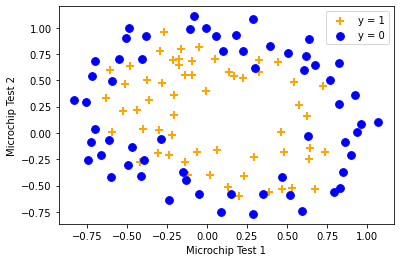

In [26]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [27]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values
X[0:5]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [28]:
def mapFeature(x1col, x2col):
    degrees = 10
    out = np.ones((x1col.shape[0], 1))

    for i in range(1, degrees+1):
      for j in range(0, i+1):
        term1 = x1col ** (i-j)
        term2 = x2col ** (j)
        term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
        out   = np.hstack(( out, term ))
    return out

In [29]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [30]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [31]:

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [32]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [33]:
def compute_gradient_logistic(X, y, w):
  """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
    """

  m, n = X.shape
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))                           
    err_i  = f_wb_i  - y[i]                       
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]        
  dj_dw = dj_dw/m                                 
      
  return dj_dw

In [34]:
# from scipy import optimize

# def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
#     result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
#     return np.array([result.x]), result.fun

print(f"{100000:4d}")

100000


In [35]:
import copy
import math

initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)

def optimizeRegularizedTheta(theta, X, Y, lr, epoch, lmbda=0.):
  m = X.shape[0]
  J_history = []
  w = copy.deepcopy(theta)

  for i in range(epoch):
    # Calculate the gradient and update the parameters
    dj_dw = compute_gradient_logistic(X, Y, w)   

    # Update Parameters using w, b, alpha and gradient
    w = w*(1-lr*(lmbda/m)) - lr * dj_dw              
  
    # Save cost J at each iteration
    if i<100000:      # prevent resource exhaustion 
        J_history.append(computeCost(w, X, Y, lmbda) )

    # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(epoch / 10) == 0:
        print(f"Epoch {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.01, 100)
print(theta.shape)
print(mincost)

(66,)
Epoch    0: Cost 0.6929404864896525   
Epoch   10: Cost 0.6909215173814715   
Epoch   20: Cost 0.6889856481748252   
Epoch   30: Cost 0.6871272905575473   
Epoch   40: Cost 0.6853412296344765   
Epoch   50: Cost 0.6836226074155769   
Epoch   60: Cost 0.6819669052379513   
Epoch   70: Cost 0.6803699255503842   
Epoch   80: Cost 0.6788277734253525   
Epoch   90: Cost 0.677336838101564   
(66,)
0.6760360170085117


In [36]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    lr = .01
    epoch = 10000

    theta, min_cost = optimizeRegularizedTheta(mytheta, myX, myy, lr, epoch, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Epoch    0: Cost 0.6929404864896525   
Epoch 1000: Cost 0.6089731028458444   
Epoch 2000: Cost 0.5699151385087614   
Epoch 3000: Cost 0.5419471641283777   
Epoch 4000: Cost 0.5200926582684235   
Epoch 5000: Cost 0.5023412514449634   
Epoch 6000: Cost 0.4875634101978463   
Epoch 7000: Cost 0.4750315991572545   
Epoch 8000: Cost 0.46424588369481873   
Epoch 9000: Cost 0.4548488510565408   
[ 1.26390863e+00  7.35472299e-01  1.34538252e+00 -2.05375384e+00
 -9.41488266e-01 -1.20166966e+00  2.36406507e-01 -4.14240066e-01
 -4.15927786e-01 -1.19583140e-02 -1.50563830e+00 -8.72486587e-02
 -6.65390914e-01 -2.97171390e-01 -1.06304407e+00 -1.61240560e-01
 -2.42749254e-01 -7.79562191e-02 -2.93242680e-01 -3.33218783e-01
 -3.29445786e-01 -1.06462582e+00  5.98712318e-03 -3.24188678e-01
 -5.37525840e-03 -3.48531108e-01 -1.63648946e-01 -8.23330094e-01
 -3.06047075e-01 -1.24790294e-01 -5.83517480e-02 -1.27212285e-01
 -5.16546925e-02 -1.84990287e-01 -2.22929336e-01 -4.03822703e-01
 -7.78978963e-01  1.9013

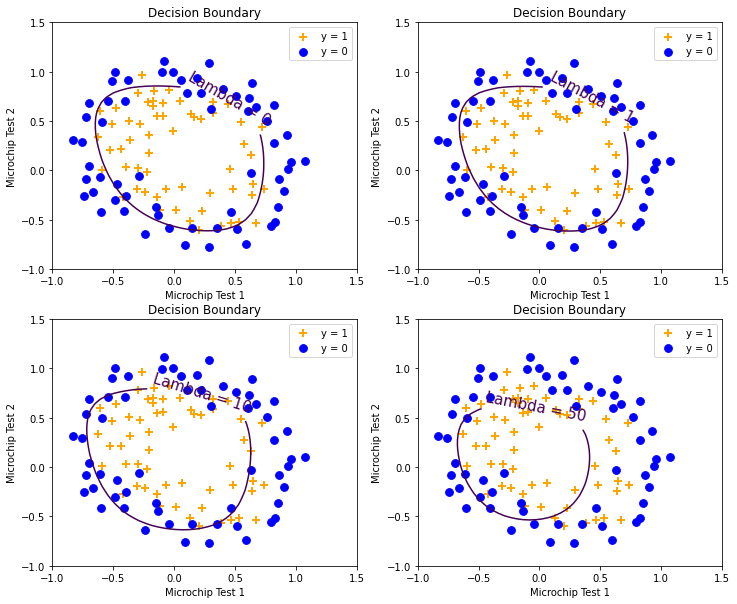

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)